In [1]:
from dask import delayed

@delayed
def sum(x, y):
    return x + y

@delayed
def sum_and_squared(x, y):
    return (x+y)**2

result1 = sum(3,5)
result2 = sum(2,4)
result = sum_and_squared(result1,result2
                        )
result.compute()

196

In [2]:
from dask.distributed import Client, progress

client = Client(n_workers=4, threads_per_worker=2, memory_limit='2GB')
client

Client Scheduler: tcp://127.0.0.1:51539 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 8.00 GB


In [3]:
result1 = sum(3,5)
result2 = sum(2,4)
result = sum_and_squared(result1,result2
                        )
result

Delayed('sum_and_squared-7cee1bf0-95b2-40a2-ad8e-76347a378efb')

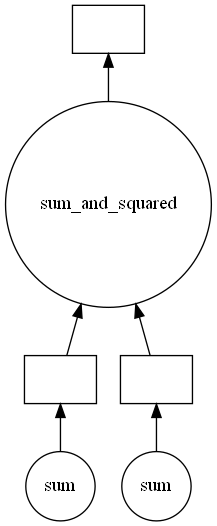

In [4]:
result.visualize()

In [12]:
# Assignments
# To complete this assignment, submit your solutions to the following tasks as a link to your Jupyter Notebook on GitHub.

# Parallelize the following code using Dask's @delayed decorator and derive the task execution graph.


@delayed
def sum_up(l): #takes a list of numbers as input
    return sum(l)

@delayed
def cube(n):
    return n**3

total = []
for i in range(1,10):
    total.append(cube(i))

print(sum_up(total))


Delayed('sum_up-5c710f89-10f5-4f43-bf59-e4213e4b5011')


In [13]:
sum_up(total).compute()

Delayed('sum-4a5e1bb6-4ca3-45c6-83e1-0573434d4981')

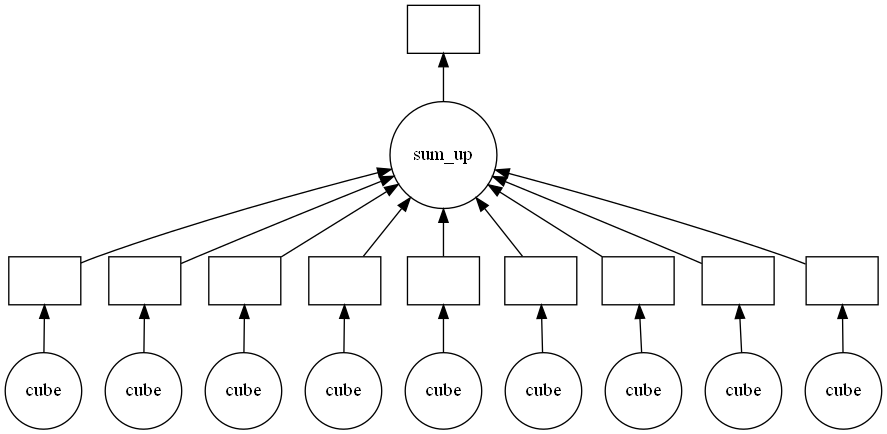

In [14]:
sum_up(total).visualize()

In [15]:
#Parallelize the following code using Dask's @delayed decorator and derive the task execution graph.
# first two fibonacci numbers
fibonacci_nums = [1,1]

# returns the nth fibonacci number
@delayed
def get_nth_fibonacci_number(n):
    if n == 1:
        return fibonacci_nums[0]
    elif n == 2:
        return fibonacci_nums[1]
    else:
        return get_nth_fibonacci_number(n-1) + get_nth_fibonacci_number(n-2)

print(get_nth_fibonacci_number(10))

Delayed('get_nth_fibonacci_number-5116e49f-8a15-47f6-b4c3-955dee09904b')


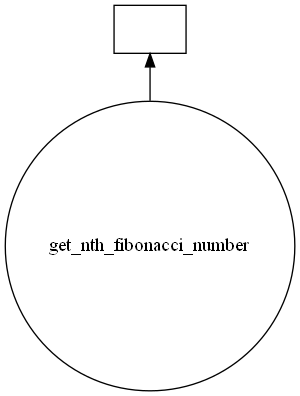

In [16]:
get_nth_fibonacci_number(10).visualize()

In [17]:
import warnings
warnings.filterwarnings("ignore")

from dask.distributed import Client, progress

client = Client(n_workers=4, threads_per_worker=2, memory_limit='2GB')
client

Client Scheduler: tcp://127.0.0.1:51883 Dashboard: http://127.0.0.1:51882/status,Cluster Workers: 4 Cores: 8 Memory: 8.00 GB


In [25]:
import dask.dataframe as dd

#DataFrames implement the pandas API
import dask.dataframe as dd

# This loads the data into a Dask DataFrame
df = dd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/creditcard.csv')

TimeoutError: 

I'm following an assignment in Thinkful Big Data checkpoint three. The users in the assignment get a different error mesage wherein we learn that we may have some empty values in the Time column. The error mentions two options. Either assign the datatype to a float or set "assume_missing" = True.

Since I recevied a different error message -  one in which my system timed out on me, I decided to go ahead and take a look at the results of both of these solutions. 

In [36]:
from datetime import datetime

In [41]:
df = dd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/creditcard.csv', dtype={'Time': 'float64'})

In [43]:
start = datetime.now()
df.describe().compute()
end =  datetime.now()

In [44]:
print(end - start)

0:02:17.058745


In [45]:
df = dd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/creditcard.csv', assume_missing=True)

In [46]:
df.describe().compute()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,6.003539e-16,6.386744e-18,-3.078411e-15,2.484443e-15,3.832046e-16,1.542399e-15,-1.341216e-15,1.532819e-16,-1.362372e-15,...,3.512709e-17,1.119277e-15,3.153455e-16,4.394479e-15,1.079360e-15,1.743781e-15,-3.506722e-16,-1.003916e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,49346.000000,-7.868600e-01,-5.536365e-01,-7.156553e-01,-7.067841e-01,-4.093779e-01,-6.546632e-01,-4.787135e-01,-1.339191e-01,-5.477089e-01,...,-2.256367e-01,-5.250530e-01,-1.301482e-01,-3.241623e-01,-2.218416e-01,-2.821043e-01,-6.089022e-02,-2.762231e-02,6.840000,0.000000
50%,76029.000000,9.301532e-02,8.999754e-02,1.743346e-01,1.809941e-01,1.480477e-01,-1.649056e-01,1.590763e-01,7.790153e-02,2.583745e-02,...,6.636310e-03,1.241855e-01,5.160336e-02,6.794774e-02,1.674311e-01,-1.290092e-03,1.088230e-02,2.345040e-02,24.990000,0.000000
75%,138472.000000,1.912886e+00,8.916958e-01,1.373682e+00,1.012508e+00,8.613822e-01,4.775488e-01,7.334868e-01,3.706835e-01,7.092123e-01,...,2.385322e-01,7.308589e-01,2.346538e-01,5.274699e-01,4.190202e-01,2.938470e-01,1.060637e-01,8.061929e-02,84.910000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [47]:
df2 = df[df["Amount"] > 10000]
df2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
npartitions=3,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [48]:
df[df["Amount"] > 10000].compute()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
46841,42951.0,-23.712839,-42.172688,-13.320825,9.925019,-13.945538,5.564891,15.710644,-2.844253,-1.580725,...,7.921600,-6.320710,-11.310338,0.404175,-4.547278,-1.577118,-2.357385,2.253662,12910.93,0.0
54018,46253.0,-21.780665,-38.305310,-12.122469,9.752791,-12.880794,4.256017,14.785051,-2.818253,-0.667338,...,7.437478,-5.619439,-10.547038,0.653249,-4.232409,-0.480459,-2.257913,2.082488,11898.09,0.0
58465,48401.0,-36.802320,-63.344698,-20.645794,16.715537,-20.672064,7.694002,24.956587,-4.730111,-2.687312,...,11.455313,-10.933144,-17.173665,1.180700,-7.025783,-2.534330,-3.602479,3.450224,19656.53,0.0
30325,95286.0,-34.549296,-60.464618,-21.340854,16.875344,-19.229075,6.335259,24.422716,-4.964566,0.188912,...,11.502580,-9.499423,-16.513186,0.744341,-7.081325,-2.604551,-3.550963,3.250802,18910.00,0.0
48486,119713.0,-20.924897,-37.943452,-14.060281,10.473005,-10.866639,6.256654,14.960521,-2.392155,-0.597076,...,6.829810,-6.926353,-9.928657,-0.447084,-4.848151,-2.241620,-2.140723,2.001492,11789.84,0.0
32983,166198.0,-35.548539,-31.850484,-48.325589,15.304184,-113.743307,73.301626,120.589494,-27.347360,-3.872425,...,-21.620120,5.712303,-1.581098,4.584549,4.554683,3.415636,31.612198,-15.430084,25691.16,0.0
42461,172273.0,-9.030538,-11.112584,-16.233798,3.592021,-40.427726,23.917837,44.054461,-7.277778,-4.210637,...,-0.269048,0.988144,7.040028,0.347693,2.520869,2.342495,3.478175,-2.713136,10199.44,0.0


In [52]:
df2 = df.groupby("Class")["Amount"].mean()

In [53]:
df2.compute()

Class
0.0     88.291022
1.0    122.211321
Name: Amount, dtype: float64

In [54]:
df["Amount2"] = df["Amount"].apply(lambda x: 1 if x>10000 else 0, meta=('Amount2', 'int64'))
df["Amount2"].head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: Amount2, dtype: int64

Some notes, which - I should call common sense; but I don't have many. 

- Running several of these jupyter lab cells at one time can cause the compute function to time out. 

- The act of setting an start time and end time before and after calling the describe compute method prevented the describe table form printing. 

- This timeout scenario can include multiple operations on the Dask calls. I am uncertain if the transaction(s) sped up due to multiple calls or because I called them separate. 

In [59]:
#How many transactions are there in total?
#Get the total number of transactions as the number of classes predicted.
count = df.Class.compute()

In [60]:
#return teh count. 
count.count()

284807

In [61]:
#How many transactions are fraud, and how many are not fraud?
count.value_counts()

0.0    284315
1.0       492
Name: Class, dtype: int64

In [62]:
persist = df.persist()

In [65]:
#What is the maximum amount in fraud transactions?
fraud = persist[persist.Class == 1]
fraud.Amount.max().compute()

2125.87

In [66]:
import dask.array as da
import numpy as np

In [67]:
%%time
x = da.random.random((10000, 10000), chunks=(1000, 1000))
y = x + x.T
z = y[::2, 5000:].mean(axis=1)
z.compute()

Wall time: 775 ms


array([1.00043708, 0.9966004 , 0.99682497, ..., 1.01286171, 0.99870094,
       0.99982107])

In [68]:
%%time
x = np.random.random((10000, 10000))
y = x + x.T
z = y[::2, 5000:].mean(axis=1)

Wall time: 2.12 s


In [69]:
x = da.random.random((10000, 10000), chunks=(1000, 1000))

In [70]:
%%time
y = x + x.T
z = y[::2, 5000:].mean(axis=1)
z.compute()

Wall time: 804 ms


array([1.01108029, 1.01017391, 1.00521132, ..., 0.99396868, 0.99761306,
       1.00170442])

In [71]:
x = da.random.random((10000, 10000), chunks=(1000, 1000))
# This persists the `x` array into the memory
x.persist()

dask.array<random_sample, shape=(10000, 10000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>

In [72]:
%%time
y = x + x.T
z = y[::2, 5000:].mean(axis=1)
z.compute()

Wall time: 493 ms


array([0.99728551, 1.01185787, 0.99912427, ..., 1.00525201, 1.00136685,
       1.0030825 ])

In [83]:
%%timeit
x = da.random.random((10000, 10000), chunks=(1000, 1000))
y = x + x.T
z = y[::2, 5000:].mean(axis=1)
z.compute()

778 ms ± 24.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [79]:
z.compute()

array([0.99728551, 1.01185787, 0.99912427, ..., 1.00525201, 1.00136685,
       1.0030825 ])

In [86]:
#Change the code above by setting chunks=(250, 250). How long does it take to run?

In [85]:
%%timeit
x = da.random.random((10000, 10000), chunks=(250,250))
y = x + x.T
z = y[::2, 5000:].mean(axis=1)
z.compute()

3.29 s ± 106 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [87]:
%%timeit
#Now, set the parameter to chunks=(500, 500). How long does it take to run? Does this one or the previous one run more quickly? Why?
x = da.random.random((10000, 10000), chunks=(500,500))
y = x + x.T
z = y[::2, 5000:].mean(axis=1)
z.compute()

1.23 s ± 32.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


The five hundred chunk seems to run more quickly. There are fewer iterations. 